In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [37]:
df = pd.read_csv('home_prices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Prices (US $)')

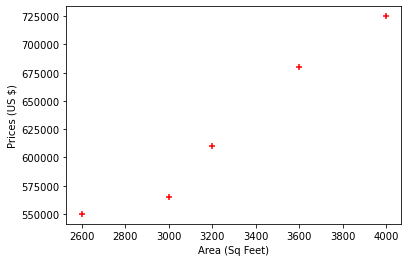

In [38]:
plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel("Area (Sq Feet)"); plt.ylabel("Prices (US $)")

In [39]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)  # First argument is 2D array.

LinearRegression()

In [40]:
reg.predict([[3300]]) # Predicting prices

array([628715.75342466])

In [41]:
m = reg.coef_  # Gradient
m

array([135.78767123])

In [42]:
c = reg.intercept_  # Y-Intercept
c

180616.43835616432

In [43]:
# y = (m * x) + c

m * 3300 + c

array([628715.75342466])

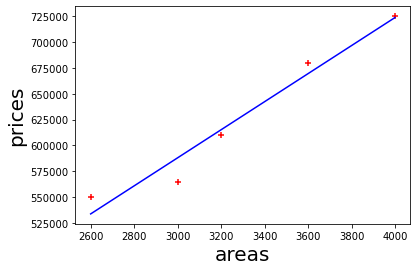

In [44]:
plt.xlabel('areas', fontsize=20); plt.ylabel('prices', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [45]:
df2 = pd.read_csv('area.csv')
df2.head(3)

,area
0,1000
1,1500
2,2300


In [46]:
prices = reg.predict(df2)  # Predicting prices in the new data frame consisting of areas.

In [47]:
df2['Prices'] = prices
df2

,area,Prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [48]:
df2.to_csv("predictions.csv", index=False) # Saving results to CSV file.

In [49]:
import pickle

with open ('model_pickel', 'wb') as f:
    pickle.dump(reg, f)

In [50]:
with open('model_pickel', 'rb') as f:
    mp = pickle.load(f)

In [52]:
mp.predict([[5000]])  # we can use the model files that we created for predictions too.

array([859554.79452055])